### Evaluation of simulation measurements
* Generate measurements with OMNeT++
* Convert them to csv using `scavetool` (done below)
* Read and analyze using Python

For more details see this tutorial: https://docs.omnetpp.org/tutorials/pandas/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import call
%matplotlib inline

In [10]:
# call scavetool to generate the CSV
!{'scavetool x ../omnet-test/results/*.vec -o measurements.csv'}

Exported 38 vectors


In [11]:
# convenience functions for parsing numbers and arrays in csv correctly
def parse_if_number(s):
    try: 
        return float(s)
    except: 
        return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

# load measurements from results folder
results = pd.read_csv('measurements.csv', converters = {
                    'attrvalue': parse_if_number,
                    'binedges': parse_ndarray,
                    'binvalues': parse_ndarray,
                    'vectime': parse_ndarray,
                    'vecvalue': parse_ndarray})
results.head()

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
0,VideoFixed-0-20180803-14:39:40-9700,runattr,NaN,NaN,configname,VideoFixed,NaN,None,None
1,VideoFixed-0-20180803-14:39:40-9700,runattr,NaN,NaN,datetime,20180803-14:39:40,NaN,None,None
2,VideoFixed-0-20180803-14:39:40-9700,runattr,NaN,NaN,experiment,VideoFixed,NaN,None,None
3,VideoFixed-0-20180803-14:39:40-9700,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,None,None
4,VideoFixed-0-20180803-14:39:40-9700,runattr,NaN,NaN,iterationvars,None,NaN,None,None


In [12]:
# select the vectors recording tokenInDelay for analyzing the delay
delays = results[(results.type == 'vector') & (results.name == 'tokenInDelay')]
delays = delays[['module', 'name', 'vectime', 'vecvalue']]
delays.head()

,module,name,vectime,vecvalue
36,VideoFixed.C_P0,tokenInDelay,"[0.795874504566, 1.69443489305, 2.617658024521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
39,VideoFixed.C_T0,tokenInDelay,"[0.795874504566, 1.69443489305, 2.617658024521...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
41,VideoFixed.C_P1,tokenInDelay,"[1.725676610603, 2.119277180594, 2.86022210638...","[0.929802106037, 0.424842287544, 0.24256408186..."
43,VideoFixed.U_P0,tokenInDelay,"[1.725676610603, 2.860222106382, 4.70642666193...","[0.929802106037, 0.242564081861, 1.11176221101..."
45,VideoFixed.S_P0,tokenInDelay,"[2.119277180594, 9.362062655293, 19.1268803922...","[0.424842287544, 0.0102127942, 0.304541211592,..."


In [13]:
# TODO: convert into table with columns module, time, delay

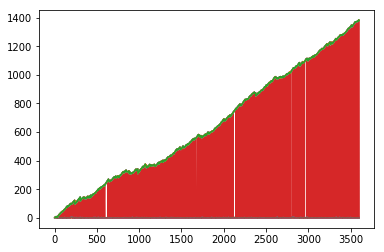

In [14]:
# increasing delay indicates bottleneck
# TODO: nicer visualization
for row in delays.itertuples():
    plt.plot(row.vectime, row.vecvalue)